PROJECT TITLE:
An Analysis of Police Officer Stop Data

TEAM MEMBERS:
J.D. Strode
Vaidehee Shah
Octavio Origel
Peter Sparks
Melissa Mongrella


PROJECT DESCRIPTION/OUTLINE:
Our project is analyzing the The Stanford Open Project's Chicago dataset. 
We have chosen four questions from the dataset to further understand the nuances of traffic stops in the city.
    

RESEARCH QUESTIONS TO ANSWER:

1) How does the race and gender of the police officer affect the race and gender of the person getting stopped?
2) What area of Chicago do the most stops occur?
3) What are the most common time points for a stop to occur?
4) Was a citation issued?
5) What are the general demographics of people who get pulled over?

DATASETS TO BE USED:
We will be using the Stanford Opening Policing Project (https://openpolicing.stanford.edu/)

ROUGH BREAKDOWN OF TASKS:
J.D. Strode - Will look at demographic relationships (Question 1)
Vaidehee Shah - Will look at the most common time points for a stop to occur (Question 3)
Octavio Origel - Will examine if age influences the occurrence of citations or arrests 
Peter Sparks - Will look at location data
Melissa Mongrella - Will look at the general demographics of people who get pulled over

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import ttest_ind
from scipy import stats as st
import json

In [2]:
# File to Load (Remember to Change These)
crime_data = "crime_data/chicagodata.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(crime_data, encoding="utf-8")

/Users/mongrella/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,officer_id_hash,...,officer_race,officer_sex,officer_years_of_service,type,violation,arrest_made,citation_issued,outcome,raw_race,raw_driver_race
0,1,2012-01-06,09:00:00,700 LINCOLN W,NaN,NaN,23.0,black,male,a6d791f976,...,white,male,17.0,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,BLACK,NaN
1,2,2012-01-01,00:00:00,NaN,NaN,NaN,23.0,hispanic,male,81da9fab7e,...,white,male,2.0,vehicular,DRIVING/NEVER ISSUED LICENSE,True,NaN,arrest,HISPANIC,NaN
2,3,2012-01-01,01:00:00,0 NORTHWEST HWY & HILLSIDE RD S,NaN,NaN,38.0,white,female,NaN,...,NaN,NaN,NaN,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,WHITE,NaN
3,4,2012-01-01,01:00:00,108 LAMON AVE N,NaN,NaN,35.0,black,male,048359e7c8,...,black,male,8.0,vehicular,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,NaN,arrest,BLACK,NaN
4,5,2012-01-01,01:00:00,3451 177TH ST W,NaN,NaN,20.0,black,male,NaN,...,NaN,NaN,NaN,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,NaN,arrest,BLACK,NaN


In [4]:
#Subject sex

df.subject_age.unique()

array([23., 38., 35., 20., 22., 63., 31., 26., 24., 33., 36., 50., 27.,
       21., 29., 32., 56., 58., 46., 37., 25., 49., 43., 45., 19., 34.,
       53., 54., 41., 18., 28., 48., 39., 30., 42., 57., 47., 44., 40.,
       52., 61., nan, 51., 60., 89., 59., 76., 64., 88., 75., 69., 62.,
       66., 71., 55., 67., 68., 17., 81., 72., 92., 65., 78., 74., 77.,
       85., 83., 70., 80., 79., 73., 84., 93., 86., 87., 82., 90., 95.,
       97., 96.])

In [5]:
df['subject_sex'] = df['subject_sex'].replace({np.nan:'Not Reported'})

In [6]:
df.subject_sex.unique()

array(['male', 'female', 'Not Reported'], dtype=object)

In [7]:
df.subject_sex.value_counts()

male            598540
female          247581
Not Reported       335
Name: subject_sex, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846456 entries, 0 to 846455
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   raw_row_number            846456 non-null  int64  
 1   date                      846456 non-null  object 
 2   time                      846456 non-null  object 
 3   location                  775414 non-null  object 
 4   lat                       641014 non-null  float64
 5   lng                       641014 non-null  float64
 6   subject_age               212223 non-null  float64
 7   subject_race              224139 non-null  object 
 8   subject_sex               846456 non-null  object 
 9   officer_id_hash           152584 non-null  object 
 10  officer_age               60063 non-null   float64
 11  officer_race              786791 non-null  object 
 12  officer_sex               786791 non-null  object 
 13  officer_years_of_service  784276 non-null  f

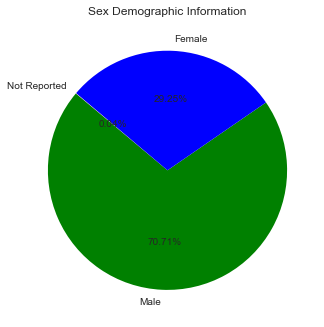

In [10]:
# Labels for the sections of our pie chart
labels = ["Male", "Female", "Not Reported"]

# The values of each section of the pie chart
sizes = [598540, 247581, 335]

# The colors of each section of the pie chart
colors = ["green", "blue", "pink"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Sex Demographic Information")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.2f%%", startangle=140)

# Save an image of the chart and print it to the screen
plt.savefig("Sex.png")
plt.show()

In [11]:
males = df[df['subject_sex']=='male']
females = df[df['subject_sex']=='female']


In [12]:
#Subject age

df.subject_age.value_counts()

24.0    9721
23.0    9668
25.0    9421
22.0    9331
26.0    8980
        ... 
92.0       2
95.0       2
96.0       1
93.0       1
97.0       1
Name: subject_age, Length: 79, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846456 entries, 0 to 846455
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   raw_row_number            846456 non-null  int64  
 1   date                      846456 non-null  object 
 2   time                      846456 non-null  object 
 3   location                  775414 non-null  object 
 4   lat                       641014 non-null  float64
 5   lng                       641014 non-null  float64
 6   subject_age               212223 non-null  float64
 7   subject_race              224139 non-null  object 
 8   subject_sex               846456 non-null  object 
 9   officer_id_hash           152584 non-null  object 
 10  officer_age               60063 non-null   float64
 11  officer_race              786791 non-null  object 
 12  officer_sex               786791 non-null  object 
 13  officer_years_of_service  784276 non-null  f

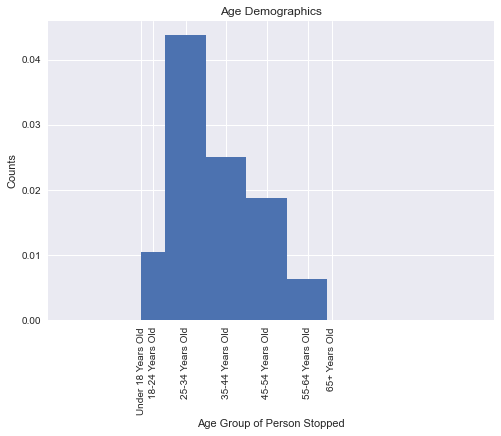

In [14]:
# Create the bins in which Data will be held
bins = [0, 17.9, 23.9, 33.9, 43.9, 53.9, 63.9, 100]
age = df['subject_age']
df = df.dropna(axis = 0)
df['subject_age'].astype(int)


# Create the names for the five bins
group_names = ["Under 18 Years Old", "18-24 Years Old", "25-34 Years Old", "35-44 Years Old", "45-54 Years Old", "55-64 Years Old", "65+ Years Old"]

#df['subject_age'] = pd.cut(df['subject_age'], bins, labels=group_names, include_lowest=True)
#axes = plt.axes()

binlocations = [18, 21, 29, 39, 49, 59, 65]
plt.hist(age, bins=bins, density=True)
#df.hist('subject_age', bins=bins, labels = group_names)
plt.xlabel('Age Group of Person Stopped')
plt.xticks(binlocations, rotation = 90, labels=group_names)
plt.ylabel('Counts')

#plt.ylim(0, len(age)+0.4)
#plt.axis([0, 5, 100000, 800000])
#axes.set_ylim([10000,800000])
plt.title("Age Demographics")

plt.savefig("Age.png")
plt.show()



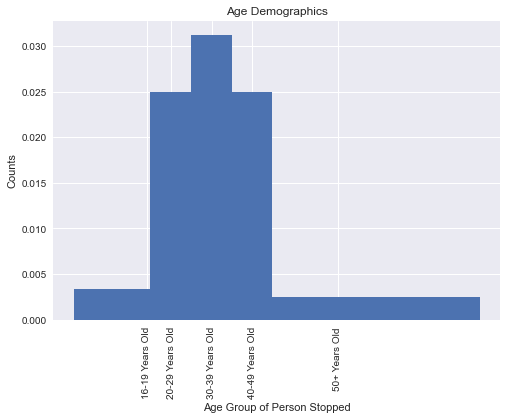

In [17]:
# Create the bins in which Data will be held
bins = [0, 18.9, 28.9, 38.9, 48.9, 100]
age = df['subject_age']
df = df.dropna(axis = 0)
df['subject_age'].astype(int)


# Create the names for the five bins
group_names = ["16-19 Years Old", "20-29 Years Old", "30-39 Years Old", "40-49 Years Old", "50+ Years Old"]

#df['subject_age'] = pd.cut(df['subject_age'], bins, labels=group_names, include_lowest=True)
#axes = plt.axes()

binlocations = [18, 24, 34, 44, 65]
plt.hist(age, bins=bins, density=True)
#df.hist('subject_age', bins=bins, labels = group_names)
plt.xlabel('Age Group of Person Stopped')
plt.xticks(binlocations, rotation = 90, labels=group_names)
plt.ylabel('Counts')

#plt.ylim(0, len(age)+0.4)
#plt.axis([0, 5, 100000, 800000])
#axes.set_ylim([10000,800000])
plt.title("Age Demographics")

plt.savefig("Age2.png")
plt.show()


In [15]:
#Subject race

df['subject_race'] = df['subject_race'].replace({np.nan:'Not Reported'})

df.subject_race.value_counts()

black       13
hispanic     3
Name: subject_race, dtype: int64

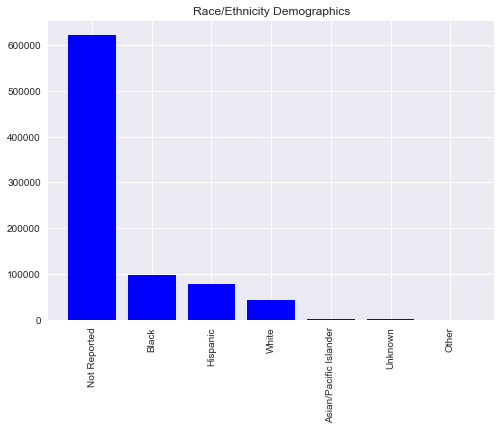

In [16]:
#bar chart
race = ["Not Reported", "Black", "Hispanic", "White", "Asian/Pacific Islander", "Unknown", "Other"]

numbers = [622317, 98236, 78124, 43870, 2279, 1463, 167]
x_axis = np.arange(len(numbers))

plt.xticks(rotation = 90)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, race)

plt.title("Race/Ethnicity Demographics")


plt.bar(x_axis, numbers, color="b", align="center")

# Save an image of the chart and print it to the screen
plt.savefig("Race_Ethnicity.png")
plt.show()